In [1]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def extract_dominant_colors(image_path, num_colors=3, resize=True):
    # Load image
    image = Image.open(image_path).convert("RGBA")
    np_image = np.array(image)

    # Remove transparent background
    mask = np_image[:, :, 3] > 0
    pixels = np_image[:, :, :3][mask]  # Only RGB, skip alpha

    # Optional: resize for faster clustering
    if resize and len(pixels) > 10000:
        pixels = pixels[np.random.choice(len(pixels), 10000, replace=False)]

    # Run KMeans
    kmeans = KMeans(n_clusters=num_colors, random_state=42)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)

    # Sort by frequency
    labels = kmeans.labels_
    counts = Counter(labels)
    sorted_colors = [colors[i] for i in sorted(counts, key=counts.get, reverse=True)]

    return sorted_colors  # List of [R, G, B] values


In [3]:
def plot_colors(colors):
    plt.figure(figsize=(8, 2))
    for i, color in enumerate(colors):
        r, g, b = color
        hex_color = "#{:02x}{:02x}{:02x}".format(r, g, b)
        plt.fill_between([i, i+1], 0, 1, color=hex_color)
        plt.text(i + 0.5, -0.2, hex_color, ha="center", va="top", fontsize=9)
    plt.xlim(0, len(colors))
    plt.axis('off')
    plt.title("Dominant Colors")
    plt.show()

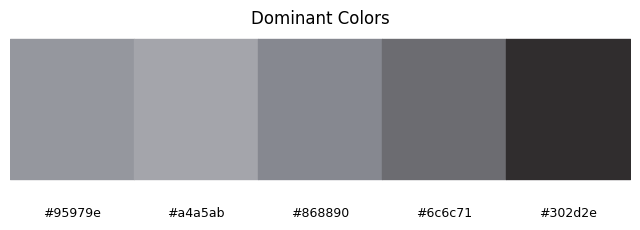

In [4]:
image_path = "segmented_objects/object_0_0.png"
colors = extract_dominant_colors(image_path, num_colors=5)
plot_colors(colors)
